In [ ]:
#### sentimental analysis assignment #### trump tweets ####

In [1]:
import pandas as pd
import numpy as np 
import spacy
import string 
import nltk
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt 
from wordcloud import wordcloud
%matplotlib inline 

 

In [ ]:
!python -m spacy download 

In [37]:
!pip install stopwords

In [2]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
 

In [3]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [4]:
afinn.shape

(2477, 2)

In [5]:
import pandas
book=pd.read_csv("trump_tweets.csv",error_bad_lines=False)
book.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1285299379746811915,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84262854,50,4,True,2020-07-20 19:43:46,We are United in our effort to defeat the Invi...,NaN,Twitter for iPhone,57356,323246,False
1,1285196013020610562,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84262854,50,4,True,2020-07-20 12:53:01,"Congratulations Allen, great job! https://t.co...",NaN,Twitter for iPhone,20850,107710,False
2,1284899438591451137,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84262854,50,4,True,2020-07-19 17:14:33,"So we catch Obama &amp; Biden, not to even men...",NaN,Twitter for iPhone,74707,300712,False
3,1284894845614600194,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84262854,50,4,True,2020-07-19 16:56:18,"The Radical Left Democrats, who totally contro...",NaN,Twitter for iPhone,39600,160630,False
4,1288503660264058880,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84328108,50,4,True,2020-07-29 15:56:26,I am in @AirForceOne_HQ flying to the Great St...,NaN,Twitter for iPhone,5727,23432,False


In [6]:
book = [text.strip() for text in book.text] # remove both the leading and the trailing characters
book = [text for text in book if text] # removes empty strings, because they are considered in Python as False 

In [7]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[0:45] 

['We are United in our effort to defeat the Invisible China Virus, and many people say that it is Patriotic to wear a… https://t.co/zcdVQe2vRn Congratulations Allen, great job!',
 'https://t.co/jjeUk1SwGm So we catch Obama &amp; Biden, not to even mention the rest of their crew, SPYING on my campaign, AND NOTHING HAPPENS?… https://t.co/zefK46dmz8 The Radical Left Democrats, who totally control Biden, will destroy our Country as we know it.',
 'Unimaginably bad thi… https://t.co/tkjXLN0CNn I am in @AirForceOne_HQ flying to the Great State of Texas.',
 'It is AMAZING in watching @FoxNews how different they a… https://t.co/4AJ9JZyeGl Mail-In Voting, unless changed by the courts, will lead to the most CORRUPT ELECTION in our Nation’s History!',
 '#RIGGEDELECTION Strong Stock Market Numbers.',
 'You want to see them dive?',
 'Vote for the Radical Left with their BIG Tax Hikes!',
 '“In my view General Flynn should never have been prosecuted in the first place.” @Judgenap Judge Andrew Napolit

In [8]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df 

,sentence
0,We are United in our effort to defeat the Invi...
1,https://t.co/jjeUk1SwGm So we catch Obama &amp...
2,Unimaginably bad thi… https://t.co/tkjXLN0CNn ...
3,It is AMAZING in watching @FoxNews how differe...
4,#RIGGEDELECTION Strong Stock Market Numbers.
...,...
2223,"....that, quite frankly, didn’t have much of a..."
2224,The Presidential Election was Rigged with hu… ...
2225,The process is going VERY s… https://t.co/gkDt...
2226,"W… https://t.co/eg0GJTW71l Loeffler, Perdue Su..."


In [9]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [11]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [16]:
# test that it works
calculate_sentiment(text = 'amazing') 

4

In [17]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [18]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0    28
1    40
2    15
3    29
4     5
5     6
6    10
7    49
8    38
9    18
Name: word_count, dtype: int64

In [19]:
sent_df 

,sentence,sentiment_value,word_count
0,We are United in our effort to defeat the Invi...,4,28
1,https://t.co/jjeUk1SwGm So we catch Obama &amp...,-3,40
2,Unimaginably bad thi… https://t.co/tkjXLN0CNn ...,-3,15
3,It is AMAZING in watching @FoxNews how differe...,4,29
4,#RIGGEDELECTION Strong Stock Market Numbers.,0,5
...,...,...,...
2223,"....that, quite frankly, didn’t have much of a...",4,14
2224,The Presidential Election was Rigged with hu… ...,8,86
2225,The process is going VERY s… https://t.co/gkDt...,0,27
2226,"W… https://t.co/eg0GJTW71l Loeffler, Perdue Su...",1,13


In [20]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
1412,...that killed our fellow citizens with illega...,-15,43
1021,#MAGA https://t.co/CNEVwNroVE On the 37th anni...,-9,58
2045,The drug companies are going crazy putting up ...,-8,45
1700,"“Evidence of voter fraud continues to grow, in...",-8,28
2221,"Another 289,000 ""excess (fraudulent) votes… ht...",-8,14
...,...,...,...
1394,My #AmericanDreamPlan is a promise to Hispanic...,11,86
20,It would be great for work… https://t.co/1c5Hy...,11,39
208,I’m proud to support infrastructure in your st...,13,33
14,Charles was a trail blazer in politics and a f...,13,87


In [21]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    2228.000000
mean        0.711400
std         2.601115
min       -15.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        15.000000
Name: sentiment_value, dtype: float64

In [22]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,https://t.co/jjeUk1SwGm So we catch Obama &amp...,-3,40
2,Unimaginably bad thi… https://t.co/tkjXLN0CNn ...,-3,15
4,#RIGGEDELECTION Strong Stock Market Numbers.,0,5
6,Vote for the Radical Left with their BIG Tax H...,0,10
11,"https://t.co/itApu2V1JU John Bolton is, with t...",-5,17
...,...,...,...
2220,T… https://t.co/aKtP3lCSpz New Lott study esti...,-1,14
2221,"Another 289,000 ""excess (fraudulent) votes… ht...",-8,14
2222,STAY TUNED!,0,2
2225,The process is going VERY s… https://t.co/gkDt...,0,27


In [23]:
sent_df[sent_df['sentiment_value']>=10]

,sentence,sentiment_value,word_count
14,Charles was a trail blazer in politics and a f...,13,87
20,It would be great for work… https://t.co/1c5Hy...,11,39
99,"@BillHagertyTN, an outstanding man and one of ...",11,31
197,Happy to support bus… https://t.co/QPyzzaDkd1 ...,15,29
205,Happy to support bus service and major fleet… ...,10,24
208,I’m proud to support infrastructure in your st...,13,33
347,We will bring hope to our most distressed comm...,10,30
350,He just helped me pass the Great American… htt...,10,62
476,"Natur… https://t.co/sjqLCuw1vg Today, it was m...",11,55
478,"With your help, your… https://t.co/OEDTWKLwa3 ...",10,30


In [24]:
sent_df['index']=range(0,len(sent_df)) 

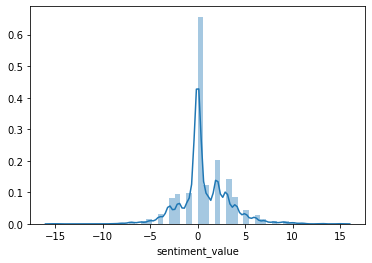

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

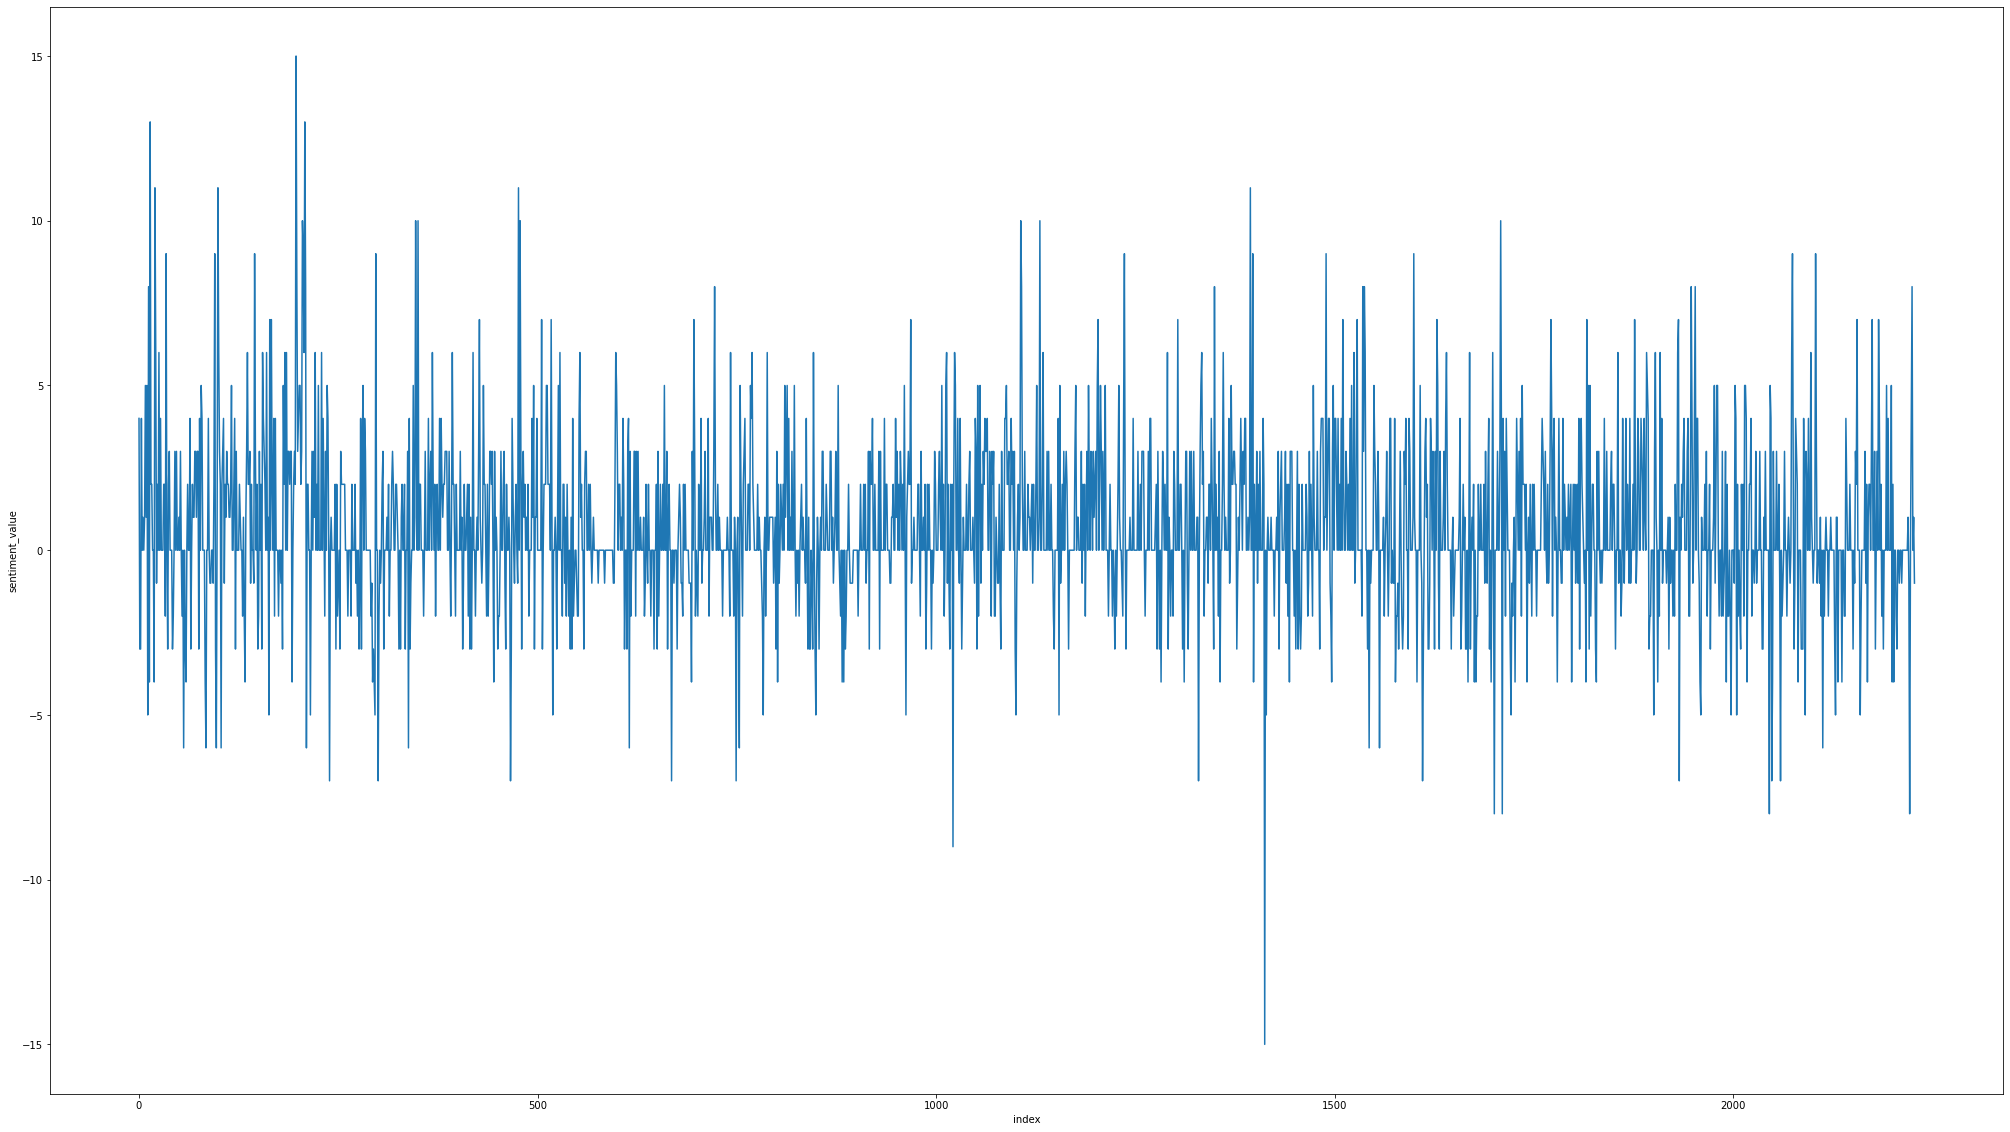

In [26]:
plt.figure(figsize=(35, 20))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

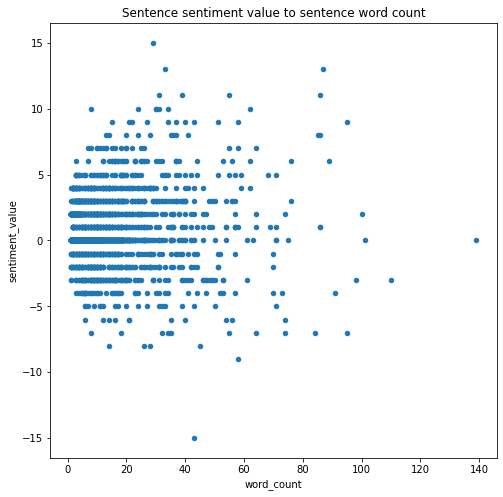

In [27]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [28]:
#### TEXT PROCESSING AND FEATURE EXTRACTION ### 

In [29]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string       # special operations on strings
import spacy        # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline  

In [30]:
book=pd.read_csv("trump_tweets.csv",error_bad_lines=False)  
book 

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1285299379746811915,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84262854,50,4,True,2020-07-20 19:43:46,We are United in our effort to defeat the Invi...,NaN,Twitter for iPhone,57356,323246,False
1,1285196013020610562,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84262854,50,4,True,2020-07-20 12:53:01,"Congratulations Allen, great job! https://t.co...",NaN,Twitter for iPhone,20850,107710,False
2,1284899438591451137,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84262854,50,4,True,2020-07-19 17:14:33,"So we catch Obama &amp; Biden, not to even men...",NaN,Twitter for iPhone,74707,300712,False
3,1284894845614600194,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84262854,50,4,True,2020-07-19 16:56:18,"The Radical Left Democrats, who totally contro...",NaN,Twitter for iPhone,39600,160630,False
4,1288503660264058880,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84328108,50,4,True,2020-07-29 15:56:26,I am in @AirForceOne_HQ flying to the Great St...,NaN,Twitter for iPhone,5727,23432,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,1344142386935570434,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88592813,51,6,True,2020-12-30 04:44:52,"I love the Great State of Georgia, but the peo...",NaN,Twitter for iPhone,41043,179227,False
1980,1344054358418345985,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88592813,51,6,True,2020-12-29 22:55:05,When are we going to be allowed to do signatur...,NaN,Twitter for iPhone,67436,264681,False
1981,1344051613216993281,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88592813,51,6,True,2020-12-29 22:44:10,It is up to the States to distribute the vacci...,NaN,Twitter for iPhone,33371,159364,False
1982,1344036020162093058,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88592813,51,6,True,2020-12-29 21:42:12,"Loeffler, Perdue Support Increasing Relief Pay...",NaN,Twitter for iPhone,26227,102394,False


In [31]:
book = [text.strip() for text in book.text] # remove both the leading and the trailing characters
book = [text for text in book if text] # removes empty strings, because they are considered in Python as False
book[0:45]

['We are United in our effort to defeat the Invisible China Virus, and many people say that it is Patriotic to wear a… https://t.co/zcdVQe2vRn',
 'Congratulations Allen, great job! https://t.co/jjeUk1SwGm',
 'So we catch Obama &amp; Biden, not to even mention the rest of their crew, SPYING on my campaign, AND NOTHING HAPPENS?… https://t.co/zefK46dmz8',
 'The Radical Left Democrats, who totally control Biden, will destroy our Country as we know it. Unimaginably bad thi… https://t.co/tkjXLN0CNn',
 'I am in @AirForceOne_HQ flying to the Great State of Texas. It is AMAZING in watching @FoxNews how different they a… https://t.co/4AJ9JZyeGl',
 'Mail-In Voting, unless changed by the courts, will lead to the most CORRUPT ELECTION in our Nation’s History! #RIGGEDELECTION',
 'Strong Stock Market Numbers. You want to see them dive? Vote for the Radical Left with their BIG Tax Hikes!',
 '“In my view General Flynn should never have been prosecuted in the first place.” @Judgenap Judge Andrew Napolit

In [32]:
# Joining the list into one string/text
text = ' '.join(book)
text 

'We are United in our effort to defeat the Invisible China Virus, and many people say that it is Patriotic to wear a… https://t.co/zcdVQe2vRn Congratulations Allen, great job! https://t.co/jjeUk1SwGm So we catch Obama &amp; Biden, not to even mention the rest of their crew, SPYING on my campaign, AND NOTHING HAPPENS?… https://t.co/zefK46dmz8 The Radical Left Democrats, who totally control Biden, will destroy our Country as we know it. Unimaginably bad thi… https://t.co/tkjXLN0CNn I am in @AirForceOne_HQ flying to the Great State of Texas. It is AMAZING in watching @FoxNews how different they a… https://t.co/4AJ9JZyeGl Mail-In Voting, unless changed by the courts, will lead to the most CORRUPT ELECTION in our Nation’s History! #RIGGEDELECTION Strong Stock Market Numbers. You want to see them dive? Vote for the Radical Left with their BIG Tax Hikes! “In my view General Flynn should never have been prosecuted in the first place.” @Judgenap Judge Andrew Napolitano  @foxandfriends You will 

In [33]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'We are United in our effort to defeat the Invisible China Virus and many people say that it is Patriotic to wear a… httpstcozcdVQe2vRn Congratulations Allen great job httpstcojjeUk1SwGm So we catch Obama amp Biden not to even mention the rest of their crew SPYING on my campaign AND NOTHING HAPPENS… httpstcozefK46dmz8 The Radical Left Democrats who totally control Biden will destroy our Country as we know it Unimaginably bad thi… httpstcotkjXLN0CNn I am in AirForceOneHQ flying to the Great State of Texas It is AMAZING in watching FoxNews how different they a… httpstco4AJ9JZyeGl MailIn Voting unless changed by the courts will lead to the most CORRUPT ELECTION in our Nation’s History RIGGEDELECTION Strong Stock Market Numbers You want to see them dive Vote for the Radical Left with their BIG Tax Hikes “In my view General Flynn should never have been prosecuted in the first place” Judgenap Judge Andrew Napolitano  foxandfriends You will never hear this on the Fake News concerning the Chin

In [34]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:200]) 

['We', 'are', 'United', 'in', 'our', 'effort', 'to', 'defeat', 'the', 'Invisible', 'China', 'Virus', 'and', 'many', 'people', 'say', 'that', 'it', 'is', 'Patriotic', 'to', 'wear', 'a…', 'httpstcozcdVQe2vRn', 'Congratulations', 'Allen', 'great', 'job', 'httpstcojjeUk1SwGm', 'So', 'we', 'catch', 'Obama', 'amp', 'Biden', 'not', 'to', 'even', 'mention', 'the', 'rest', 'of', 'their', 'crew', 'SPYING', 'on', 'my', 'campaign', 'AND', 'NOTHING', 'HAPPENS…', 'httpstcozefK46dmz8', 'The', 'Radical', 'Left', 'Democrats', 'who', 'totally', 'control', 'Biden', 'will', 'destroy', 'our', 'Country', 'as', 'we', 'know', 'it', 'Unimaginably', 'bad', 'thi…', 'httpstcotkjXLN0CNn', 'I', 'am', 'in', 'AirForceOneHQ', 'flying', 'to', 'the', 'Great', 'State', 'of', 'Texas', 'It', 'is', 'AMAZING', 'in', 'watching', 'FoxNews', 'how', 'different', 'they', 'a…', 'httpstco4AJ9JZyeGl', 'MailIn', 'Voting', 'unless', 'changed', 'by', 'the', 'courts', 'will', 'lead', 'to', 'the', 'most', 'CORRUPT', 'ELECTION', 'in', 'ou

In [35]:
len(text_tokens) 

32986

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [41]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:75]) 

['We', 'United', 'effort', 'defeat', 'Invisible', 'China', 'Virus', 'many', 'people', 'say', 'Patriotic', 'wear', 'a…', 'httpstcozcdVQe2vRn', 'Congratulations', 'Allen', 'great', 'job', 'httpstcojjeUk1SwGm', 'So', 'catch', 'Obama', 'amp', 'Biden', 'even', 'mention', 'rest', 'crew', 'SPYING', 'campaign', 'AND', 'NOTHING', 'HAPPENS…', 'httpstcozefK46dmz8', 'The', 'Radical', 'Left', 'Democrats', 'totally', 'control', 'Biden', 'destroy', 'Country', 'know', 'Unimaginably', 'bad', 'thi…', 'httpstcotkjXLN0CNn', 'I', 'AirForceOneHQ', 'flying', 'Great', 'State', 'Texas', 'It', 'AMAZING', 'watching', 'FoxNews', 'different', 'a…', 'httpstco4AJ9JZyeGl', 'MailIn', 'Voting', 'unless', 'changed', 'courts', 'lead', 'CORRUPT', 'ELECTION', 'Nation', '’', 'History', 'RIGGEDELECTION', 'Strong', 'Stock']


In [42]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:100]) 

['we', 'united', 'effort', 'defeat', 'invisible', 'china', 'virus', 'many', 'people', 'say', 'patriotic', 'wear', 'a…', 'httpstcozcdvqe2vrn', 'congratulations', 'allen', 'great', 'job', 'httpstcojjeuk1swgm', 'so', 'catch', 'obama', 'amp', 'biden', 'even', 'mention', 'rest', 'crew', 'spying', 'campaign', 'and', 'nothing', 'happens…', 'httpstcozefk46dmz8', 'the', 'radical', 'left', 'democrats', 'totally', 'control', 'biden', 'destroy', 'country', 'know', 'unimaginably', 'bad', 'thi…', 'httpstcotkjxln0cnn', 'i', 'airforceonehq', 'flying', 'great', 'state', 'texas', 'it', 'amazing', 'watching', 'foxnews', 'different', 'a…', 'httpstco4aj9jzyegl', 'mailin', 'voting', 'unless', 'changed', 'courts', 'lead', 'corrupt', 'election', 'nation', '’', 'history', 'riggedelection', 'strong', 'stock', 'market', 'numbers', 'you', 'want', 'see', 'dive', 'vote', 'radical', 'left', 'big', 'tax', 'hikes', '“', 'in', 'view', 'general', 'flynn', 'never', 'prosecuted', 'first', 'place', '”', 'judgenap', 'judge'

In [43]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:50])

['we', 'unit', 'effort', 'defeat', 'invis', 'china', 'viru', 'mani', 'peopl', 'say', 'patriot', 'wear', 'a…', 'httpstcozcdvqe2vrn', 'congratul', 'allen', 'great', 'job', 'httpstcojjeuk1swgm', 'so', 'catch', 'obama', 'amp', 'biden', 'even', 'mention', 'rest', 'crew', 'spi', 'campaign', 'and', 'noth', 'happens…', 'httpstcozefk46dmz8', 'the', 'radic', 'left', 'democrat', 'total', 'control', 'biden', 'destroy', 'countri', 'know', 'unimagin', 'bad', 'thi…', 'httpstcotkjxln0cnn', 'i', 'airforceonehq']


In [44]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [45]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:200]) 

We United effort defeat Invisible China Virus many people say Patriotic wear a… httpstcozcdVQe2vRn Congratulations Allen great job httpstcojjeUk1SwGm So catch Obama amp Biden even mention rest crew SPYING campaign AND NOTHING HAPPENS… httpstcozefK46dmz8 The Radical Left Democrats totally control Biden destroy Country know Unimaginably bad thi… httpstcotkjXLN0CNn I AirForceOneHQ flying Great State Texas It AMAZING watching FoxNews different a… httpstco4AJ9JZyeGl MailIn Voting unless changed courts lead CORRUPT ELECTION Nation ’ History RIGGEDELECTION Strong Stock Market Numbers You want see dive Vote Radical Left BIG Tax Hikes “ In view General Flynn never prosecuted first place ” Judgenap Judge Andrew Napolitano foxandfriends You never hear Fake News concerning China Virus comparison countries wh… httpstco7DUmo0EGBL Tremendous progress made Vaccines Therapeutics Looking forward live sports time I witness player kneeling National Anthem sign grea… httpstcold98zeAK3j Thank good reviews c

In [46]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:100])

['-PRON-', 'United', 'effort', 'defeat', 'invisible', 'China', 'Virus', 'many', 'people', 'say', 'patriotic', 'wear', 'a', '…', 'httpstcozcdvqe2vrn', 'Congratulations', 'Allen', 'great', 'job', 'httpstcojjeUk1SwGm', 'so', 'catch', 'Obama', 'amp', 'Biden', 'even', 'mention', 'rest', 'crew', 'spying', 'campaign', 'and', 'nothing', 'HAPPENS', '…', 'httpstcozefK46dmz8', 'the', 'Radical', 'Left', 'Democrats', 'totally', 'control', 'Biden', 'destroy', 'Country', 'know', 'unimaginably', 'bad', 'thi', '…', 'httpstcotkjxln0cnn', '-PRON-', 'airforceonehq', 'fly', 'Great', 'State', 'Texas', '-PRON-', 'amazing', 'watch', 'FoxNews', 'different', 'a', '…', 'httpstco4aj9jzyegl', 'MailIn', 'vote', 'unless', 'change', 'court', 'lead', 'corrupt', 'election', 'nation', "'", 'history', 'RIGGEDELECTION', 'strong', 'Stock', 'Market', 'number', '-PRON-', 'want', 'see', 'dive', 'vote', 'Radical', 'Left', 'BIG', 'Tax', 'hike', '"', 'in', 'view', 'General', 'Flynn', 'never', 'prosecute', 'first', 'place']


In [47]:
###Feature Extraction

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 

In [49]:
print(vectorizer.vocabulary_)

{'pron': 4300, 'united': 5173, 'effort': 1133, 'defeat': 958, 'invisible': 3402, 'china': 691, 'virus': 5270, 'many': 3698, 'people': 4129, 'say': 4606, 'patriotic': 4107, 'wear': 5325, 'httpstcozcdvqe2vrn': 3238, 'congratulations': 800, 'allen': 257, 'great': 1510, 'job': 3448, 'httpstcojjeuk1swgm': 2419, 'so': 4755, 'catch': 630, 'obama': 3978, 'amp': 294, 'biden': 476, 'even': 1217, 'mention': 3760, 'rest': 4489, 'crew': 881, 'spying': 4815, 'campaign': 597, 'and': 301, 'nothing': 3956, 'happens': 1557, 'httpstcozefk46dmz8': 3242, 'the': 5006, 'radical': 4360, 'left': 3572, 'democrats': 979, 'totally': 5080, 'control': 829, 'destroy': 1001, 'country': 858, 'know': 3518, 'unimaginably': 5171, 'bad': 407, 'thi': 5017, 'httpstcotkjxln0cnn': 2927, 'airforceonehq': 241, 'fly': 1363, 'state': 4830, 'texas': 4996, 'amazing': 276, 'watch': 5313, 'foxnews': 1398, 'different': 1017, 'httpstco4aj9jzyegl': 1792, 'mailin': 3682, 'vote': 5277, 'unless': 5176, 'change': 663, 'court': 865, 'lead': 

In [50]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100]) 

['2010', '2016', '2020', '2022', '2025', '205000', '211', '22', '221000', '23', '230', '230th', '24', '245th', '25', '25500', '259', '25th', '26', '27', '278', '28149', '289000', '2nd', '30', '300', '30000', '307000', '33', '331', '335', '3400', '342am', '35', '36', '36page', '37th', '3rd', '4000', '400000', '400pme', '401', '401k', '42248', '45', '466', '47', '48', '4th', '50']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
###Let's see how can bigrams and trigrams can be included here

In [52]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book) 

In [53]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['all', 'america', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'because', 'been', 'biden', 'big', 'but', 'by', 'co', 'country', 'democrats', 'do', 'election', 'even', 'fake', 'fake news', 'for', 'for the', 'from', 'georgia', 'get', 'going', 'great', 'has', 'have', 'he', 'his', 'https', 'https co', 'if', 'in', 'in the', 'is', 'it', 'joe', 'joe biden', 'just', 'left', 'like', 'maga', 'many', 'media', 'more', 'my', 'never', 'new', 'news', 'no', 'not', 'now', 'of', 'of the', 'on', 'or', 'our', 'out', 'pennsylvania', 'people', 'president', 'see', 'so', 'state', 'states', 'than', 'thank', 'thank you', 'that', 'the', 'they', 'this', 'to', 'to the', 'today', 'trump', 'up', 'very', 'via', 'vote', 'votes', 'was', 'we', 'were', 'what', 'which', 'who', 'will', 'will be', 'win', 'with', 'would', 'years', 'you', 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [54]:
###TFidf vectorizer¶

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['00', '000', '2016', '2020', '47', 'about', 'after', 'again', 'against', 'all', 'all of', 'all over', 'all over the', 'allow', 'also', 'always', 'am', 'amendment', 'america', 'america great', 'america great again', 'american', 'americans', 'amp', 'an', 'and', 'and https', 'and https co', 'and the', 'and vote', 'another', 'any', 'are', 'are going', 'are going to', 'arizona', 'as', 'at', 'at the', 'back', 'bad', 'ballot', 'ballots', 'be', 'because', 'been', 'before', 'being', 'best', 'better', 'biden', 'biden and', 'biden has', 'biden is', 'big', 'big tech', 'biggest', 'bill', 'book', 'breitbartnews', 'briankempga', 'bus', 'but', 'by', 'by the', 'call', 'called', 'campaign', 'can', 'carolina', 'cases', 'china', 'china virus', 'co', 'come', 'coming', 'complete', 'conference', 'congratulations', 'congress', 'congressman', 'corrupt', 'corruption', 'could', 'country', 'county', 'court', 'covid', 'crazy', 'crime', 'crowd', 'day', 'debate', 'democrat', 'democrats', 'dems', 'did', 'didn', 'dis

In [56]:
##Generate wordcloud

In [57]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

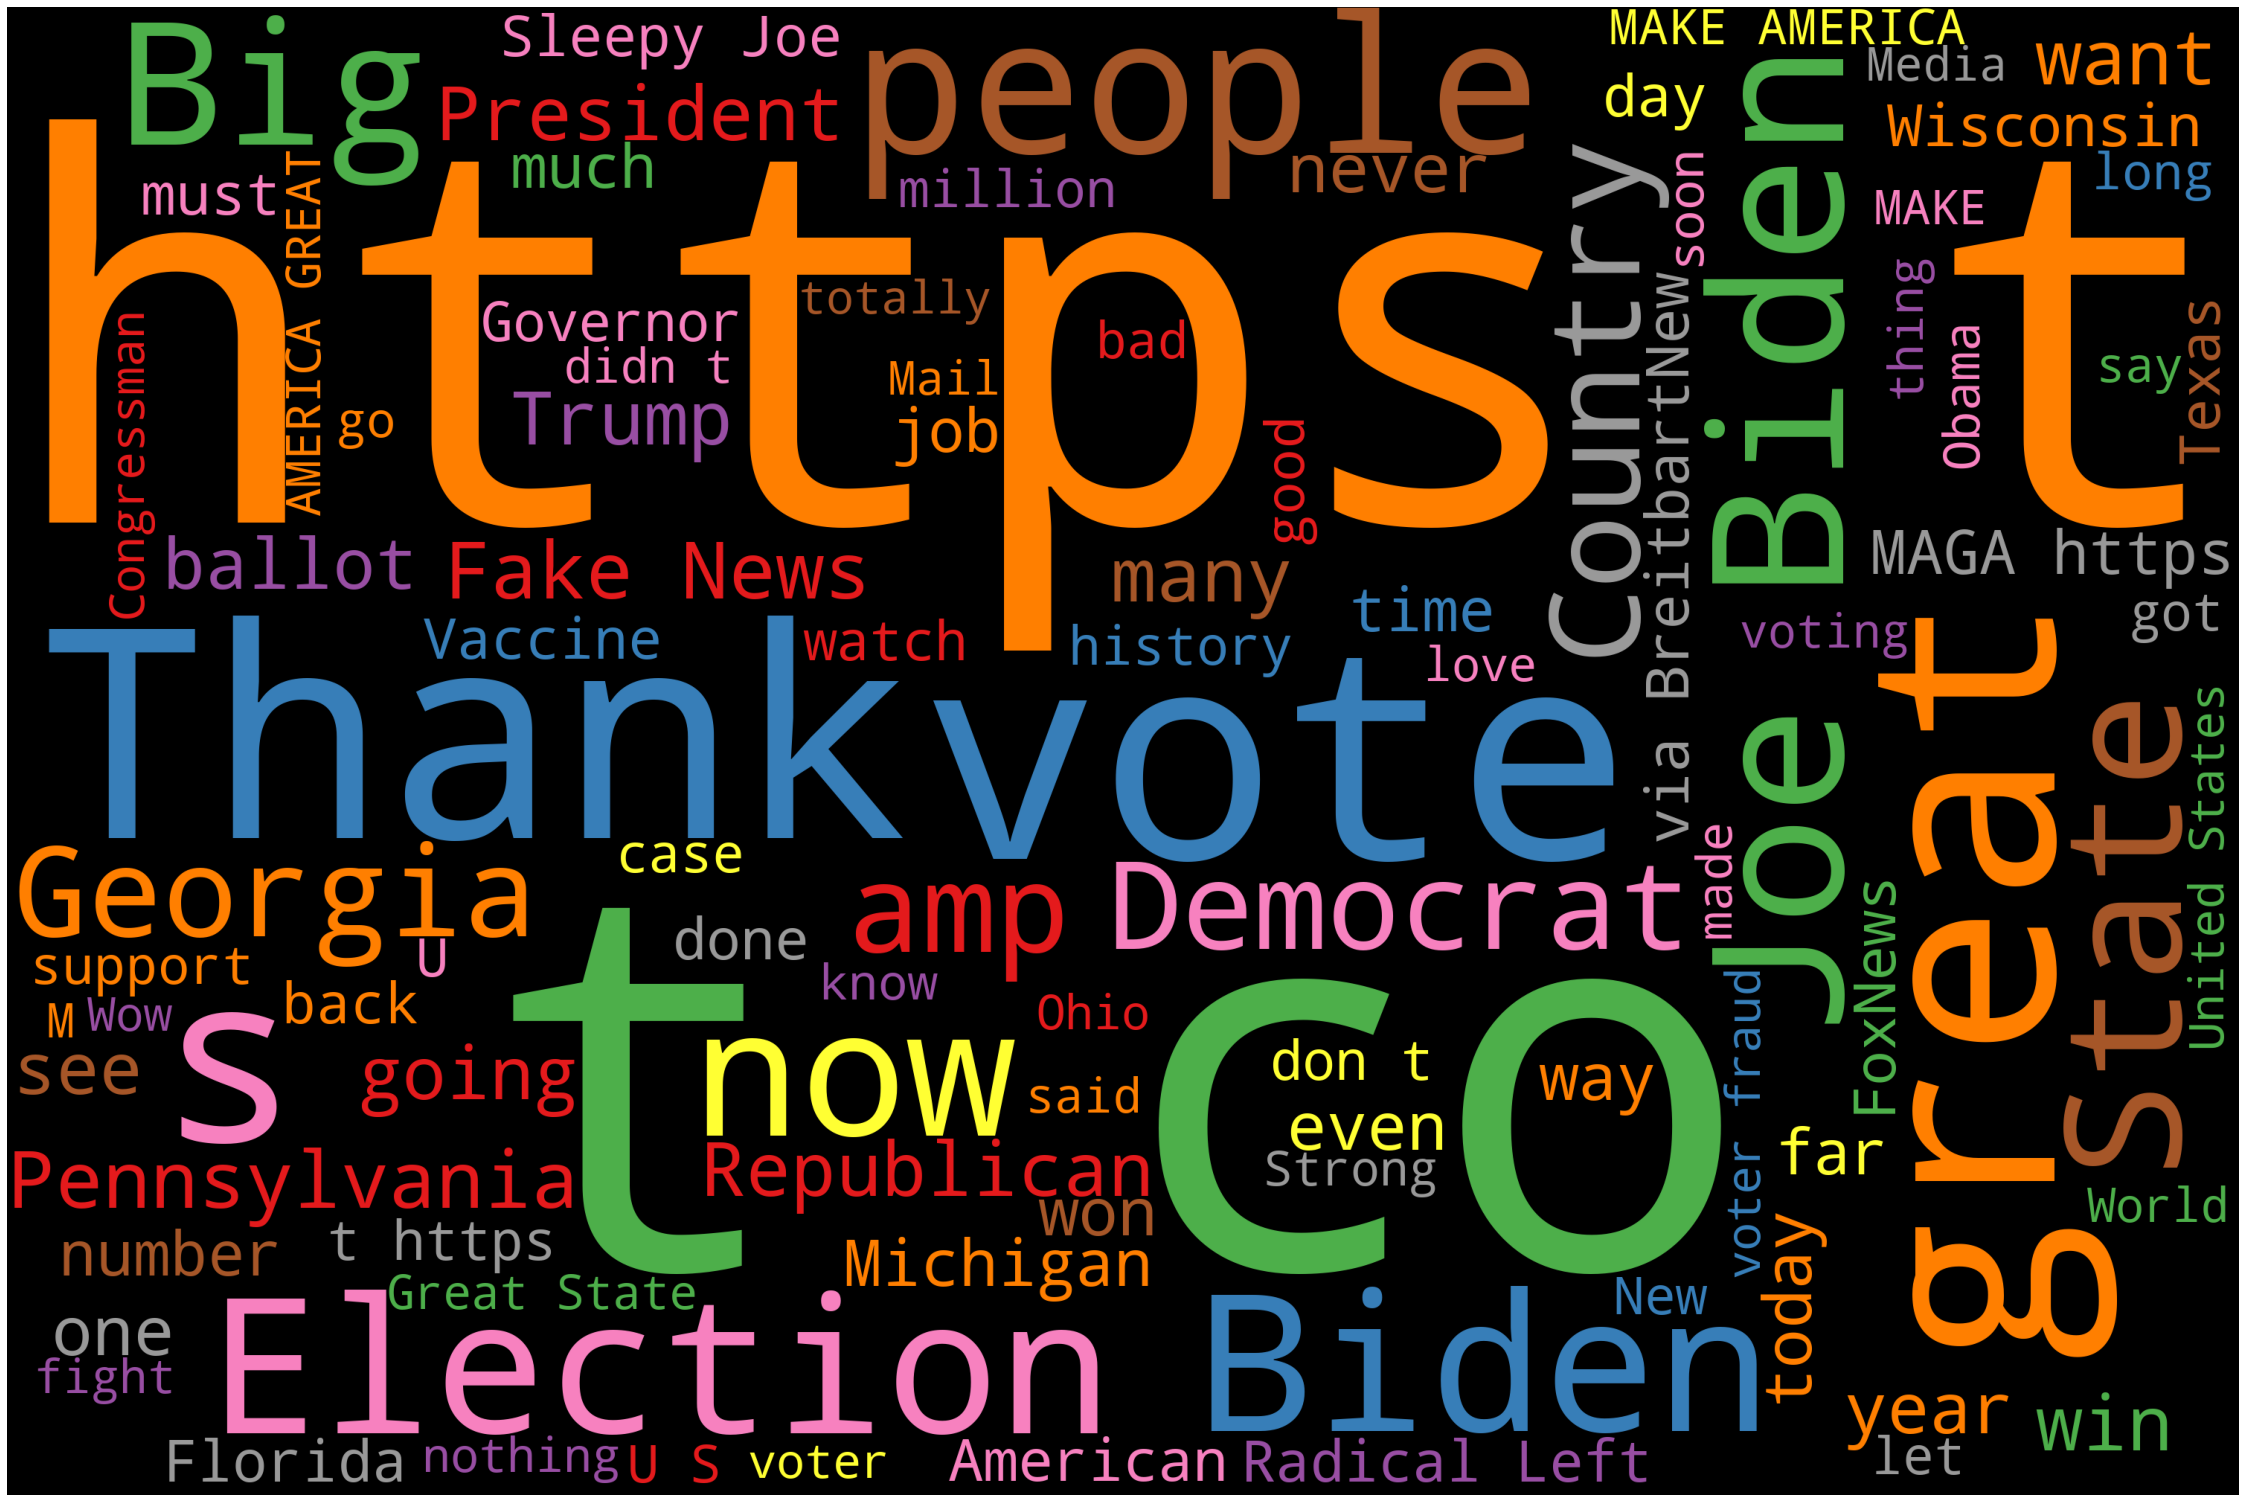

In [63]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set1',stopwords=stopwords).generate(text)
# Plot
wordcloud = plot_cloud(wordcloud)